# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [18]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [19]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [21]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

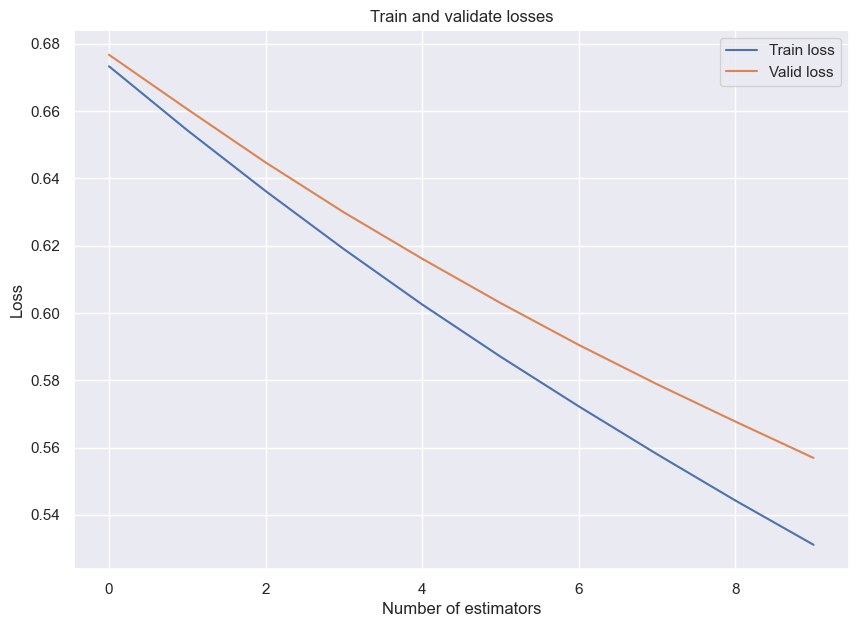

CPU times: user 840 ms, sys: 3.81 ms, total: 844 ms
Wall time: 672 ms
Train ROC-AUC 0.9890
Valid ROC-AUC 0.9171
Test ROC-AUC 0.9157


In [23]:
boosting = Boosting(plot=True)

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

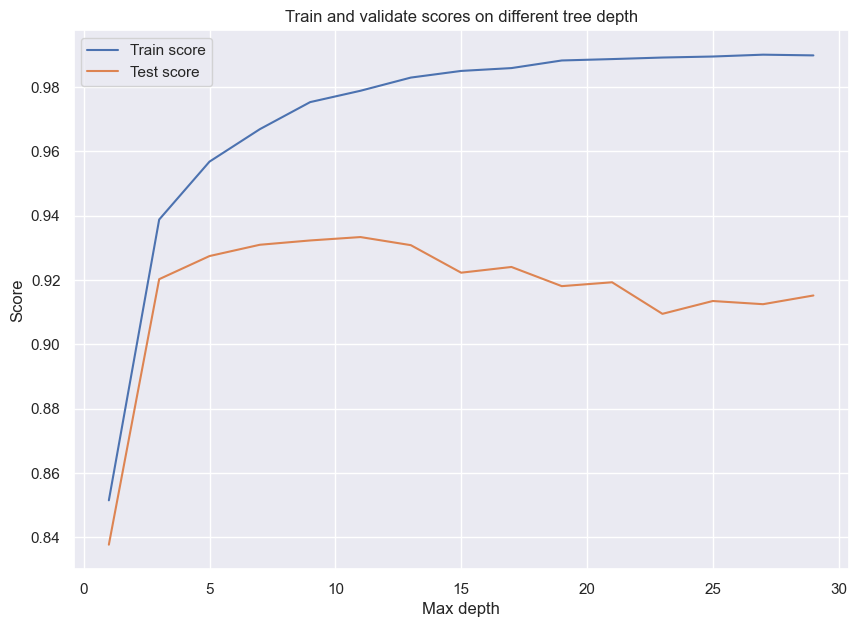

Best max depth parameter: 11


In [24]:
results = {}

depths = range(1, 30, 2)
train_score = []
test_score = []
for depth in depths:
    boosting = Boosting(base_model_params={'max_depth': depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)

    train_pred = boosting.predict_proba(x_train)[:, 1]
    test_pred = boosting.predict_proba(x_test)[:, 1]

    train_score.append(boosting.score(x_train, y_train))
    test_score.append(boosting.score(x_test, y_test))

plt.figure(figsize=(10, 7))
plt.plot(depths, train_score, label='Train score')
plt.plot(depths, test_score, label='Test score')
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.legend()
plt.title('Train and validate scores on different tree depth')
plt.show()

best_score_index = np.argmax(test_score)
print('Best max depth parameter:', depths[best_score_index])

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Лучшее качество показала модель с max_depth = 9. Как известно из лекций, в бустинг лучше брать несложные модели с небольшой глубиной, тогда переобучение будет меньше. Однако в нашем классе довольно мало базовых моделей (10), поэтому деревья получились не такой уж и маленькой глубины, но все равно довольно маленькой 

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [25]:
import optuna

In [26]:
def boosting_optimization(trial):
    base_model_params = {}
    n_estimators = trial.suggest_int('n_estimators', 1, 200)
    learning_rate = trial.suggest_float('learning_rate', 0, 1)
    early_stopping_rounds = trial.suggest_int('early_stopping_rounds', 1, 15)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 200)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 200)

    base_model_params['max_depth'] = max_depth
    base_model_params['min_samples_split'] = min_samples_split
    base_model_params['min_samples_leaf'] = min_samples_leaf

    boosting = Boosting(base_model_params=base_model_params, n_estimators=n_estimators, learning_rate=learning_rate, early_stopping_rounds=early_stopping_rounds)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    return boosting.score(x_valid, y_valid)

study = optuna.create_study(direction='maximize')
study.optimize(boosting_optimization, n_trials=100)
study.best_params

[I 2023-12-21 18:49:50,273] A new study created in memory with name: no-name-49a927b7-0143-44ed-920e-015a4978bc2c


[I 2023-12-21 18:49:51,422] Trial 0 finished with value: 0.9347319235684244 and parameters: {'n_estimators': 42, 'learning_rate': 0.06885020254098262, 'early_stopping_rounds': 12, 'max_depth': 16, 'min_samples_split': 200, 'min_samples_leaf': 24}. Best is trial 0 with value: 0.9347319235684244.
[I 2023-12-21 18:49:51,930] Trial 1 finished with value: 0.9096727177524857 and parameters: {'n_estimators': 23, 'learning_rate': 0.5757596773436979, 'early_stopping_rounds': 4, 'max_depth': 1, 'min_samples_split': 27, 'min_samples_leaf': 155}. Best is trial 0 with value: 0.9347319235684244.
[I 2023-12-21 18:49:53,758] Trial 2 finished with value: 0.9357384423941579 and parameters: {'n_estimators': 71, 'learning_rate': 0.27317636127584943, 'early_stopping_rounds': 8, 'max_depth': 19, 'min_samples_split': 140, 'min_samples_leaf': 168}. Best is trial 2 with value: 0.9357384423941579.
[I 2023-12-21 18:49:56,392] Trial 3 finished with value: 0.9390944363694125 and parameters: {'n_estimators': 102, '

{'n_estimators': 145,
 'learning_rate': 0.7017470822705786,
 'early_stopping_rounds': 9,
 'max_depth': 4,
 'min_samples_split': 53,
 'min_samples_leaf': 13}

In [39]:
print('Best score val:', study.best_value)

Best score val: 0.9438648247611613


In [40]:
base_model_params = {
    'max_depth': study.best_params['max_depth'],
    'min_samples_split': study.best_params['min_samples_split'],
    'min_samples_leaf': study.best_params['min_samples_leaf'],
}
b_params = {
    'early_stopping_rounds': study.best_params['early_stopping_rounds'],
    'learning_rate': study.best_params['learning_rate'],
    'early_stopping_rounds': study.best_params['early_stopping_rounds'],
}

boosting = Boosting(base_model_params=base_model_params, **b_params)
boosting.fit(x_train, y_train, x_valid, y_valid)
print('Test score:', boosting.score(x_test, y_test))


Test score: 0.9301399099072148


## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [41]:
# функция взята из дз по linclass
def plot_calibration_curve(y_test, preds, model_name):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios, label=f'{model_name} Сurve')
    plt.ylim([-0.05, 1.05])
    plt.grid()
    plt.plot([0, 1], [0, 1], linestyle='--', label='Ideal Curve')
    plt.ylabel('Positive Ratio')
    plt.xlabel('Probabilities')
    plt.title(f'Calibration curve of {model_name}')
    plt.grid()
    plt.legend()

In [42]:
from sklearn.linear_model import LogisticRegression

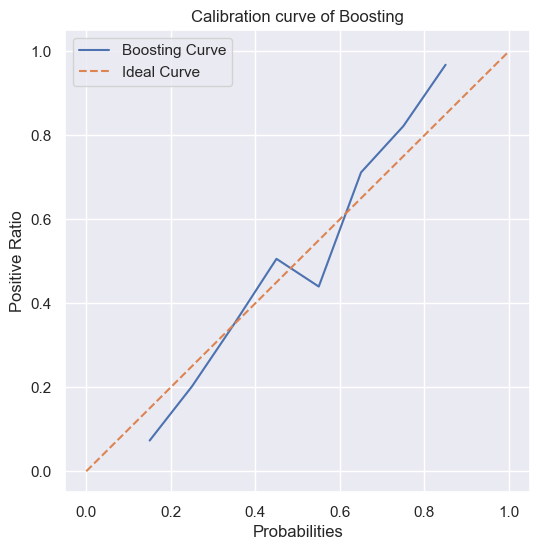

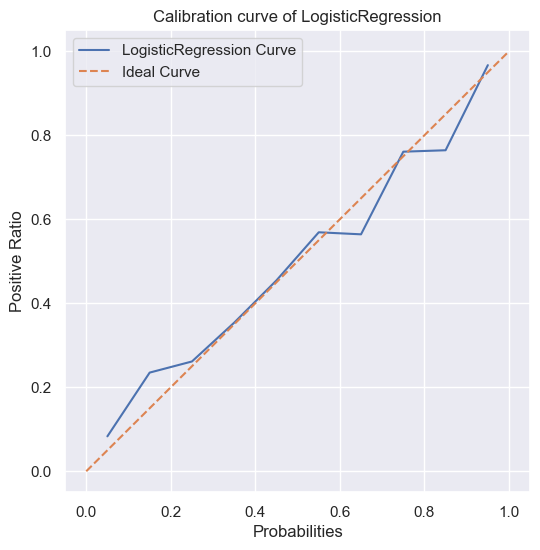

In [43]:

boosting = Boosting(base_model_params=base_model_params, **b_params)
boosting.fit(x_train, y_train, x_valid, y_valid)
pred = boosting.predict_proba(x_test)[:, 1]

lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict_proba(x_test)[:, 1]

plot_calibration_curve(y_test, pred, 'Boosting')
plot_calibration_curve(y_test, pred_lr, 'LogisticRegression')


Как мы знаем, логрег корректно предсказывает вероятности, поэтому ее кривую можно воспринимать как очень хорошую. Видно, что наш бустинг тоже неплохо предсказал вероятности (может чуть похуже, чем логрег, но кривая все равно достаточно хороша)

Наверное, так случилось из-за нашей функции потерь + сигмоиды

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

Sum: 1.0


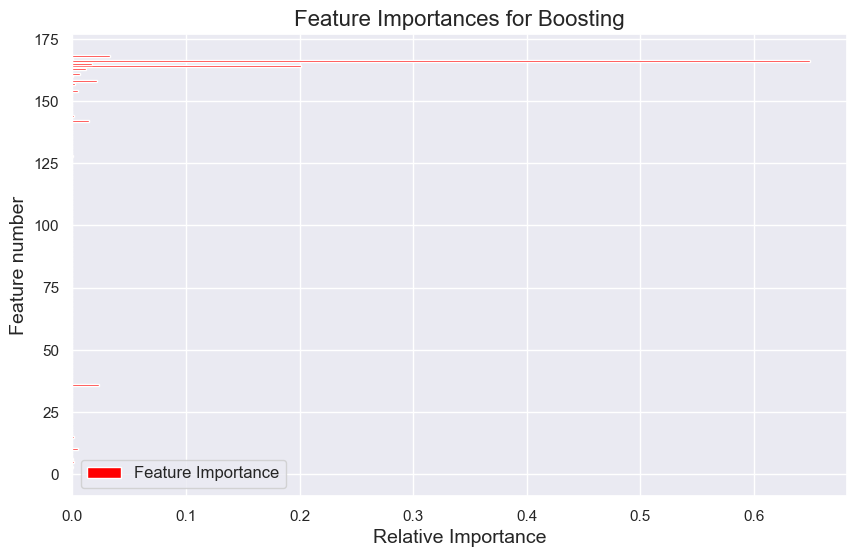

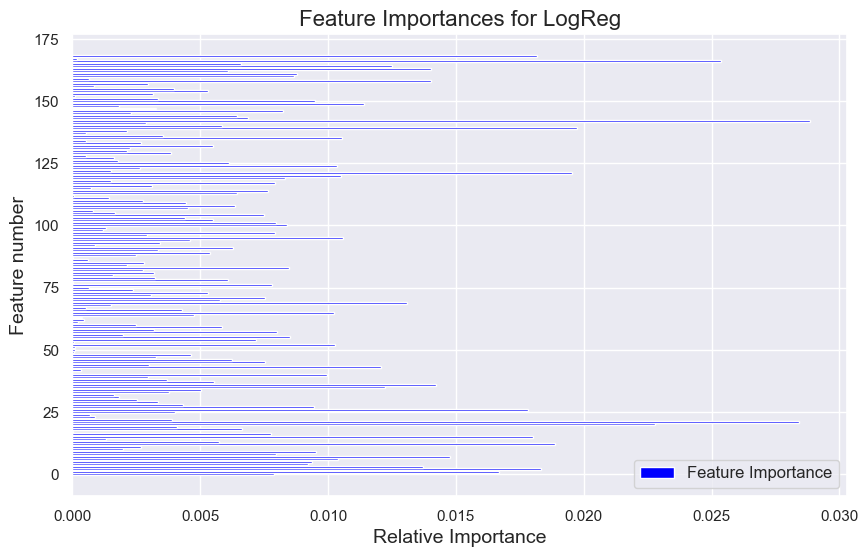

In [44]:
feature_importances = boosting.feature_importances_

print('Sum:', feature_importances.sum())

importances = boosting.feature_importances_

plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Boosting', fontsize=16)
plt.xlabel('Relative Importance', fontsize=14)
plt.ylabel('Feature number', fontsize=14)
plt.barh(np.arange(len(importances)), importances, color='red', align='center')
plt.legend(['Feature Importance'], fontsize=12)
plt.show()

abs_weights = np.abs(lr.coef_)
weights = (abs_weights / np.sum(abs_weights)).tolist()[0]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances for LogReg', fontsize=16)
plt.xlabel('Relative Importance', fontsize=14)
plt.ylabel('Feature number', fontsize=14)
plt.barh(np.arange(len(weights)), weights, color='blue', align='center')
plt.legend(['Feature Importance'], fontsize=12)
plt.show()



Можем заметить, что бустинг выбрал довольно маленькое подмножество фичей (ровно те, по которым деревьям удобно делать сплит), в то время как lr распределила важность более снисходительно, тут намного больше признаков с большим feature_importance.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [46]:
from tqdm import tqdm


indexes = np.argsort(importances)[::-1]

best_score = -1
best_amount = 0
k_best = np.arange(1, len(indexes))
for k in tqdm(k_best):
    boosting = Boosting(base_model_params=base_model_params, **b_params)
    boosting.fit(x_train[:, indexes[:k]], y_train, x_valid[:, indexes[:k]], y_valid)
    score = boosting.score(x_valid[:, indexes[:k]], y_valid)
    if score > best_score:
        best_score = score
        best_amount = k

print('Best score:', best_score)
print('Best features amount:', best_amount)


100%|██████████| 168/168 [00:41<00:00,  4.01it/s]

Best score: 0.9324419136469106
Best features amount: 105


In [47]:
boosting = Boosting(base_model_params=base_model_params, **b_params)
boosting.fit(x_train[:, indexes[:best_amount]], y_train, x_valid[:, indexes[:best_amount]], y_valid)
boosting.score(x_test[:, indexes[:best_amount]], y_test)

0.9301973790903495

Действительно, стало немного лучше. Оптимальное количество лучших фичей оказалось равным 105

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [52]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from tqdm import tqdm


x_blending = None
y_blending = None

kf = KFold(n_splits=10)
for train_index, test_index in tqdm(kf.split(x_train)):
    lr = LogisticRegression(max_iter=100000)
    lr.fit(x_train[train_index], y_train[train_index])

    boosting = Boosting(base_model_params=base_model_params, **b_params)
    boosting.fit(x_train[train_index], y_train[train_index], x_valid, y_valid)

    lr_pred = lr.predict_proba(x_train[test_index])[:, 1]
    boost_pred = boosting.predict_proba(x_train[test_index])[:, 1]

    x_blending_fold = np.hstack((lr_pred.reshape(-1, 1), boost_pred.reshape(-1, 1)))

    if x_blending is not None:
        x_blending = np.vstack((x_blending, x_blending_fold))
        y_blending = np.vstack((y_blending, y_train[test_index].reshape(-1, 1)))
    else:
        x_blending = x_blending_fold
        y_blending = y_train[test_index].reshape(-1, 1)


0it [00:00, ?it/s]

10it [00:02,  3.58it/s]


In [53]:
from sklearn.metrics import roc_auc_score


linreg = LinearRegression()
linreg.fit(x_blending, y_blending)

pred = linreg.predict(np.hstack((lr.predict_proba(x_test)[:, 1].reshape(-1, 1), boosting.predict_proba(x_test)[:, 1].reshape(-1, 1))))
roc_auc_score(y_test, pred)


0.9394129168680712

как видмм, качество стало еще лучше

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [59]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier()
catboost_model.fit(x_train, y_train)
pred = catboost_model.predict_proba(x_test)[:, 1]
print('Test AUC-ROC:', roc_auc_score(y_test, pred))


Learning rate set to 0.036078
0:	learn: 0.6491456	total: 4.74ms	remaining: 4.73s
1:	learn: 0.6106099	total: 8.29ms	remaining: 4.13s
2:	learn: 0.5804628	total: 11.8ms	remaining: 3.93s
3:	learn: 0.5522560	total: 15ms	remaining: 3.74s
4:	learn: 0.5262191	total: 19.2ms	remaining: 3.81s
5:	learn: 0.5008078	total: 23.3ms	remaining: 3.85s
6:	learn: 0.4812964	total: 26.6ms	remaining: 3.78s
7:	learn: 0.4620363	total: 29.5ms	remaining: 3.65s
8:	learn: 0.4461815	total: 32.1ms	remaining: 3.53s
9:	learn: 0.4303349	total: 35ms	remaining: 3.46s
10:	learn: 0.4142074	total: 37.7ms	remaining: 3.39s
11:	learn: 0.4011999	total: 40.1ms	remaining: 3.3s
12:	learn: 0.3907486	total: 42.8ms	remaining: 3.25s
13:	learn: 0.3808039	total: 45.3ms	remaining: 3.19s
14:	learn: 0.3710193	total: 48ms	remaining: 3.15s
15:	learn: 0.3641416	total: 50.7ms	remaining: 3.12s
16:	learn: 0.3554514	total: 53.6ms	remaining: 3.1s
17:	learn: 0.3492318	total: 56.4ms	remaining: 3.08s
18:	learn: 0.3419544	total: 59.2ms	remaining: 3.06s


получили еще больший прирост в качестве

го попробуем подобрать параметры катбуста

In [63]:
def cat_optimization(trial):
    iterations = trial.suggest_int('iterations', 2, 1000)
    depth = trial.suggest_int('depth', 2, 16)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1)

    catboost_model = CatBoostClassifier(iterations=iterations, depth=depth, learning_rate=learning_rate, verbose=0)
    catboost_model.fit(x_train, y_train)
    pred = catboost_model.predict_proba(x_valid)[:, 1]
    return roc_auc_score(y_valid, pred)

study = optuna.create_study(direction='maximize')
study.optimize(cat_optimization, n_trials=10)

best_params = study.best_params
print(best_params)
print(study.best_trial)


[I 2023-12-21 19:16:34,604] A new study created in memory with name: no-name-de17bf03-ea2a-49c4-a045-eb5c3bd9a9ec


[I 2023-12-21 19:16:35,401] Trial 0 finished with value: 0.938651440375533 and parameters: {'iterations': 398, 'depth': 4, 'learning_rate': 0.887232084549188}. Best is trial 0 with value: 0.938651440375533.
[I 2023-12-21 19:16:37,257] Trial 1 finished with value: 0.9408512547163108 and parameters: {'iterations': 870, 'depth': 4, 'learning_rate': 0.4579859378672894}. Best is trial 1 with value: 0.9408512547163108.
[I 2023-12-21 19:16:38,057] Trial 2 finished with value: 0.9448877065019838 and parameters: {'iterations': 421, 'depth': 3, 'learning_rate': 0.5700533833344964}. Best is trial 2 with value: 0.9448877065019838.
[I 2023-12-21 19:16:42,776] Trial 3 finished with value: 0.9404912705843477 and parameters: {'iterations': 850, 'depth': 9, 'learning_rate': 0.31439335024881027}. Best is trial 2 with value: 0.9448877065019838.
[I 2023-12-21 19:16:48,056] Trial 4 finished with value: 0.9355560557552363 and parameters: {'iterations': 489, 'depth': 11, 'learning_rate': 0.7703524810669474}.

{'iterations': 164, 'depth': 3, 'learning_rate': 0.24040034265961768}
FrozenTrial(number=6, state=1, values=[0.9473034315028421], datetime_start=datetime.datetime(2023, 12, 21, 19, 17, 4, 57054), datetime_complete=datetime.datetime(2023, 12, 21, 19, 17, 4, 402888), params={'iterations': 164, 'depth': 3, 'learning_rate': 0.24040034265961768}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=1000, log=False, low=2, step=1), 'depth': IntDistribution(high=16, log=False, low=2, step=1), 'learning_rate': FloatDistribution(high=1.0, log=False, low=0.01, step=None)}, trial_id=6, value=None)


катбуст учится - лавэха мутится

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?

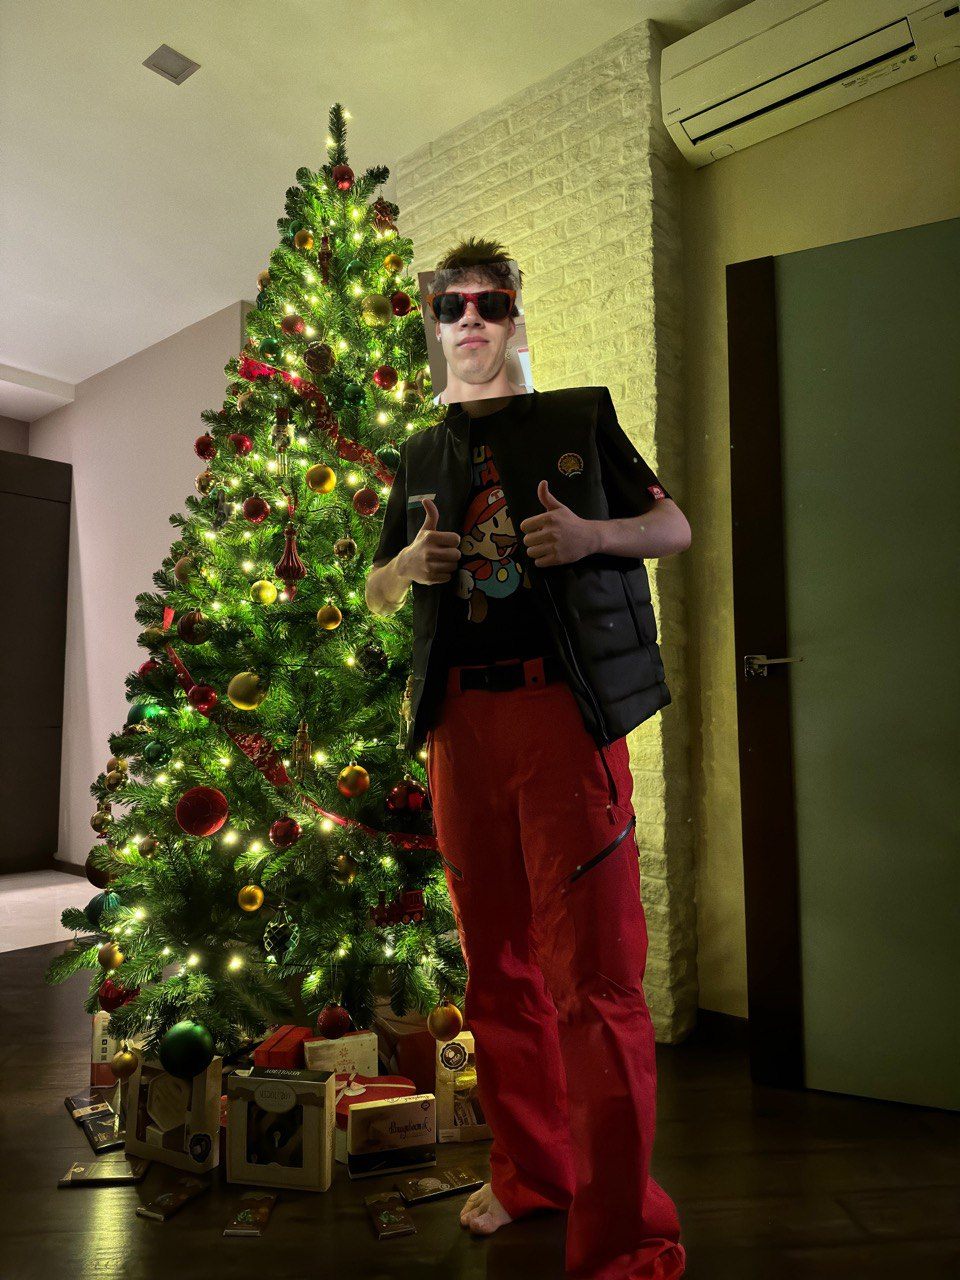

In [2]:
from IPython.display import Image
Image(filename='/Users/antonnuzhdin/Downloads/photo_2023-12-22 16.31.15.jpeg')

это я и мой друг Тимур